In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style('whitegrid')
%matplotlib inline

## 3DCNN HV8

In [23]:
df_est_log = pd.read_csv("est_error_predision_HV8.csv", index_col=0)
df_refine_log = pd.read_csv("refine_error_predision_HV8.csv", index_col=0)
df_time_log = pd.read_csv("HV8_time_log.csv", index_col=0)

In [24]:
time_min=df_time_log.describe().min()
time_max=df_time_log.describe().max()
time_ave=df_time_log.describe().mean()
print("min:{}, max:{}, mean:{}".format(time_min, time_max, time_ave))

min:preprocess_time    3.762275
estimation_time    3.524822
refinement_time    3.524822
dtype: float64, max:preprocess_time    32.175064
estimation_time    27.288914
refinement_time    27.288914
dtype: float64, mean:preprocess_time    22.116682
estimation_time    16.192916
refinement_time    16.192916
dtype: float64


In [25]:
df_est_log.describe()

,x,y,z,roll,pitch,yaw
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,-2.021483,8.466237,-14.939256,-11.485098,4.000994,-8.323482
std,5.911625,2.412028,3.031782,42.707942,5.757041,30.300768
min,-12.438138,5.863193,-17.638828,-165.433800,-1.516647,-116.290210
25%,-4.079942,6.821466,-16.750778,-0.908550,1.174501,-2.957961
50%,-2.386318,7.930686,-16.125463,-0.591359,2.859132,-1.146904
75%,-0.474671,8.598617,-13.864896,0.561402,3.265815,2.047462
max,13.098718,15.100346,-5.846716,5.106292,19.604813,7.842887


In [26]:
df_refine_log.describe()

,x,y,z,roll,pitch,yaw
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,-0.041975,0.804858,0.603137,11.398380,1.438514,-8.435453
std,0.515637,0.383281,2.475794,46.209243,0.513808,30.730026
min,-1.208443,0.276205,-0.507189,-1.170665,-0.272448,-118.395740
25%,-0.329471,0.657691,-0.179442,-0.622872,1.434987,-2.814571
50%,-0.102805,0.693606,-0.053286,-0.517698,1.496298,-0.877738
75%,0.185015,0.967348,0.230399,-0.423633,1.617021,0.924296
max,1.149895,1.906253,9.497544,178.431920,2.018869,7.423965


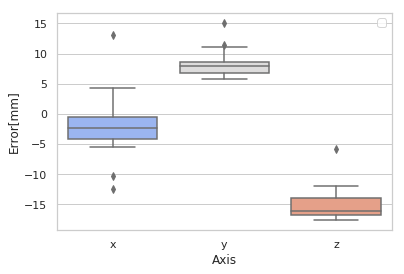

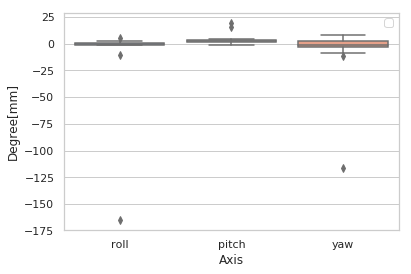

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Axis')
ax.set_ylabel('Error[mm]')
ax.legend()
sns.boxplot(data=df_est_log[["x", "y", "z"]], palette='coolwarm', ax=ax)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Axis')
ax.set_ylabel('Error[degree]')
ax.legend()
sns.boxplot(data=df_est_log[["roll", "pitch", "yaw"]], palette='coolwarm', ax=ax)

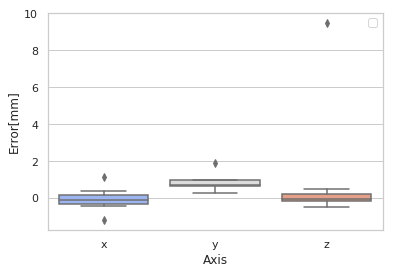

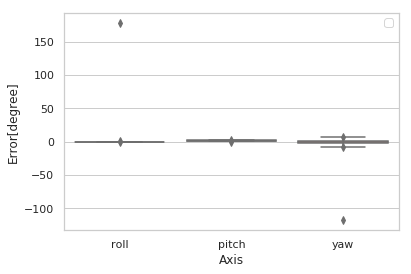

In [28]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Axis')
ax.set_ylabel('Error[mm]')
#ax.set_ylim(-5, 5)
ax.legend()
sns.boxplot(data=df_refine_log[["x", "y", "z"]], palette='coolwarm', ax=ax)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Axis')
ax.set_ylabel('Error[degree]')
#ax.set_ylim(-5, 5)
ax.legend()
sns.boxplot(data=df_refine_log[["roll", "pitch", "yaw"]], palette='coolwarm', ax=ax)

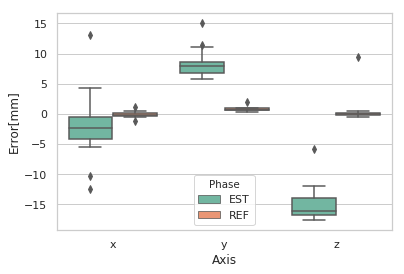

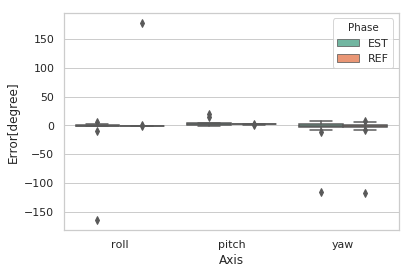

In [31]:
df_est_melt_xyz = pd.melt(df_est_log[["x", "y", "z"]])
df_est_melt_xyz["Phase"] = "EST"
df_ref_melt_xyz = pd.melt(df_refine_log[["x", "y", "z"]])
df_ref_melt_xyz["Phase"] = "REF"

df_est_melt_rpy = pd.melt(df_est_log[["roll", "pitch", "yaw"]])
df_est_melt_rpy["Phase"] = "EST"
df_ref_melt_rpy = pd.melt(df_refine_log[["roll", "pitch", "yaw"]])
df_ref_melt_rpy["Phase"] = "REF"

df_cat_xyz = pd.concat([df_est_melt_xyz, df_ref_melt_xyz], axis=0)
df_cat_rpy = pd.concat([df_est_melt_rpy, df_ref_melt_rpy], axis=0)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.legend()
sns.boxplot(x="variable", y="value", data=df_cat_xyz, palette='Set2', hue="Phase", ax=ax)
ax.set_xlabel('Axis')
ax.set_ylabel('Error[mm]')
fig.savefig("HV8_xyz_3DCNN_result.png")


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.legend()
sns.boxplot(x="variable", y="value", data=df_cat_rpy, palette='Set2', hue="Phase", ax=ax)
ax.set_xlabel('Axis')
ax.set_ylabel('Error[degree]')
fig.savefig("HV8_rpy_3DCNN_result.png")